<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Project_Model_term3_Candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

**Problem Statement**

The goal is to predict Candy Flavour if it is of type Fruity considering other variables as input from Candy Dataset using Logistic regression,Decision tree and Random Forest algos.

In [0]:
warnings.filterwarnings("ignore") # to ignore warnings

**Data Loading & Description**

The dataset consists of the information about candy Ingredients.

Various variables present in the dataset includes data of Chocolate,Fruity,winpercent,Bar etc.

The dataset comprises of 85 observations of 11 columns. Below is a table showing names of all the columns and their description

In [4]:
candy=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv")
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


**Data Preprocessing**

In [5]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [87]:
candy.shape

(85, 11)

In [6]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [7]:
candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [8]:
candy.isna().count()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

In [9]:
print(candy.shape)

(85, 13)


In [0]:
candy.drop(["competitorname"],axis=1,inplace=True) # Competitorname Coloumn is of not much use while prediction , hence dropping 

In [11]:
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


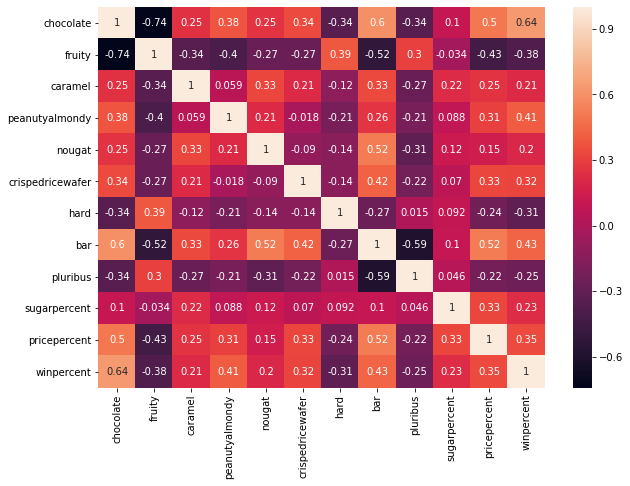

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(candy.corr(),annot=True)

**Observation**

1. Chocolate and Winpercent has strong Correlation

2. Chocolate and Bar has strong correlation

3. Nougat and Bar has strong correlation

4. Chocolate and Fruity has very weak Correlation



In [13]:
candy.groupby("fruity").size()

fruity
0    47
1    38
dtype: int64

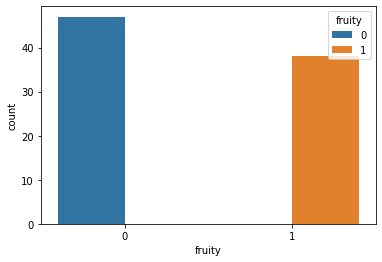

In [15]:
sns.countplot(x=candy["fruity"],data=candy,hue="fruity")

* Fruity count is 38 while Non Fruity ones are 47




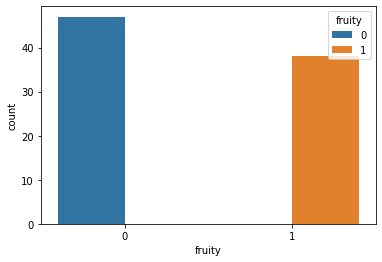

In [16]:
sns.countplot(x=candy["fruity"],data=candy,hue="fruity")

In [17]:
candy.groupby(["chocolate","fruity"]).size()

chocolate  fruity
0          0         11
           1         37
1          0         36
           1          1
dtype: int64

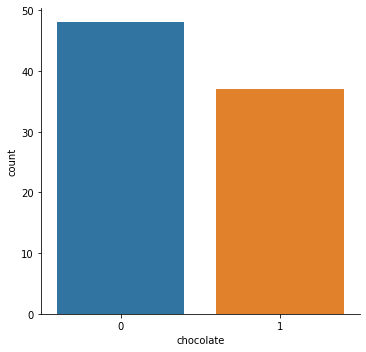

In [18]:
sns.factorplot(x="chocolate",data=candy,kind="count")

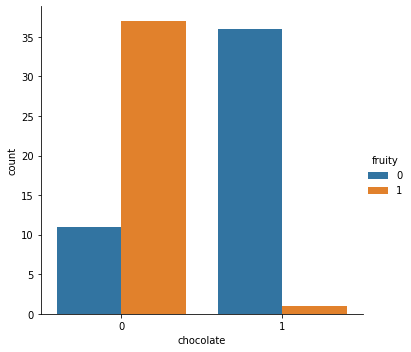

In [19]:
sns.factorplot(x="chocolate",hue="fruity",data=candy,kind="count")

* If Candy is of Chocolate flavour, then nearly Nil (only1) is of fruity type

* If Candy is of no Chocolate flavour , then 75% of candies are of fruity Flavour



**Preprocessing**

In [0]:
from sklearn.preprocessing import StandardScaler # for Scaling Purpose

* For Scaling Purpose

In [0]:
fruity=candy["fruity"]

In [0]:
candy.drop(["fruity"],axis=1,inplace=True)

In [0]:
candy_1=StandardScaler().fit_transform(candy)

In [0]:
candy_scalar=pd.DataFrame(candy_1)

In [26]:
candy_scalar.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.138990,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594,0.901261,1.376914,1.138603
1,1.138990,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594,0.445922,0.148273,1.181755
2,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,-1.242308,-1.234361
3,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,0.148273,-0.287147
4,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,1.520236,0.148273,0.138417


In [0]:
candy_scalar[11]=fruity

In [0]:
candy_scalar.columns=["chocolate","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent","winpercent","fruity"]

Putting coloumns back after Scaling

In [29]:
candy_scalar.head()

,chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,fruity
0,1.138990,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594,0.901261,1.376914,1.138603,0
1,1.138990,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594,0.445922,0.148273,1.181755,0
2,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,-1.242308,-1.234361,0
3,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,0.148273,-0.287147,0
4,-0.877971,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,1.520236,0.148273,0.138417,1


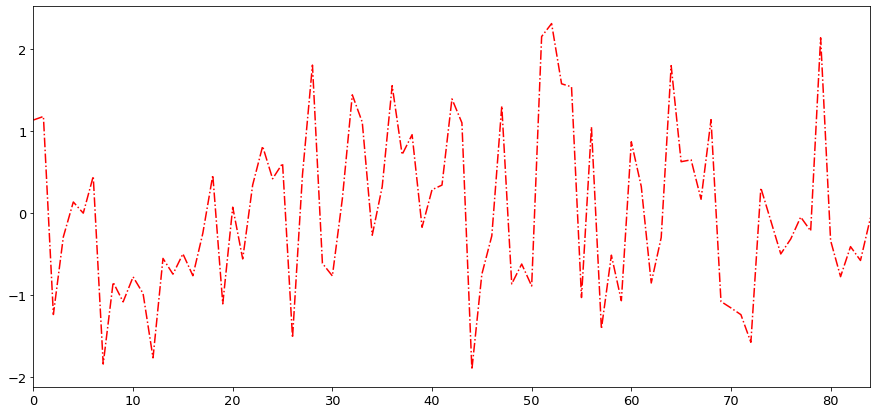

In [30]:
candy_scalar["winpercent"].plot.line(figsize=(15,7),fontsize=13,color="r",linestyle="-.")

* This Line chart shows winpercent distribution among Chocolates
* from 10-20 : Low wine content
* from 30-65 : Good amount of wine content




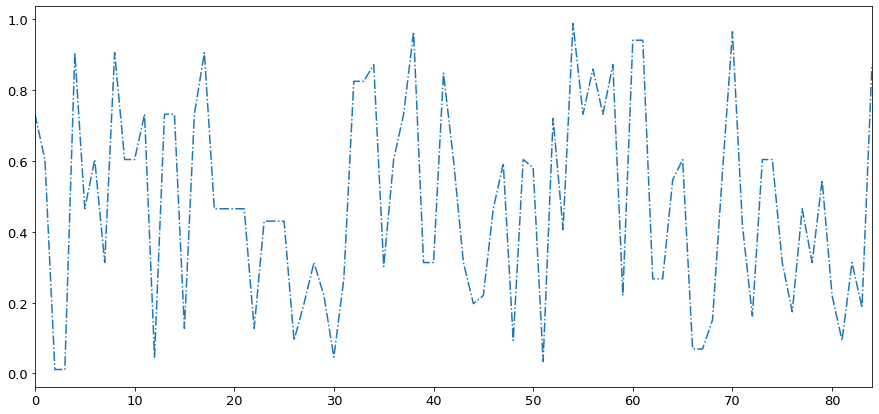

In [31]:
candy["sugarpercent"].plot.line(figsize=(15,7),fontsize=13,linestyle="-.")

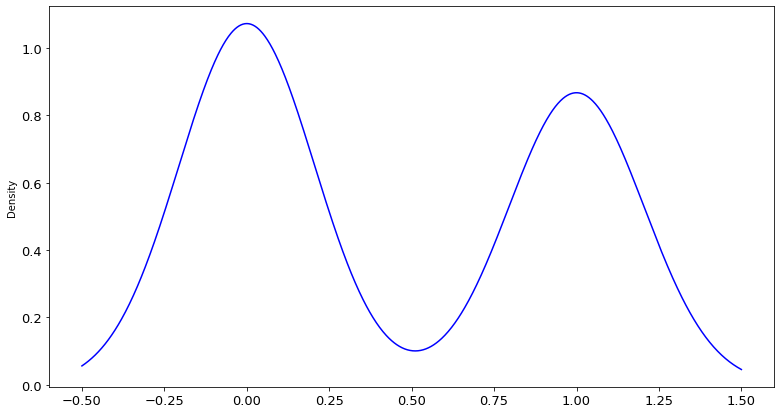

In [32]:
candy_scalar["fruity"].plot.kde(figsize=(13,7),color="b",fontsize=13)

* We can confirm that Fruity variable is normally distributed across candies



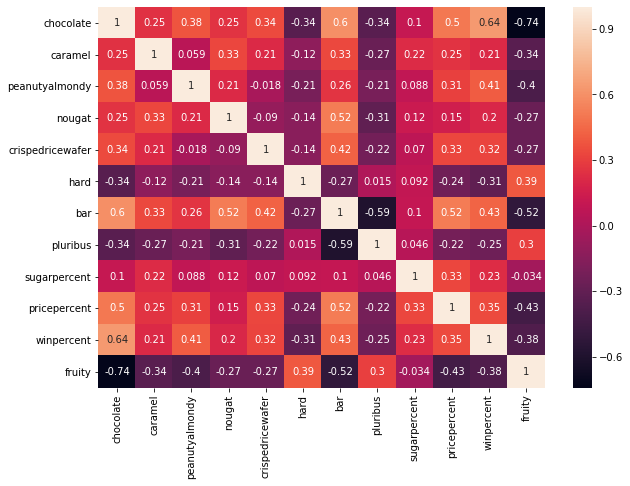

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(candy_scalar.corr(),annot=True)

1. Chocolate and Winpercent has strong Correlation

2. Chocolate and Bar has strong correlation

3. Nougat and Bar has strong correlation

4. Chocolate and Fruity has very weak Correlation

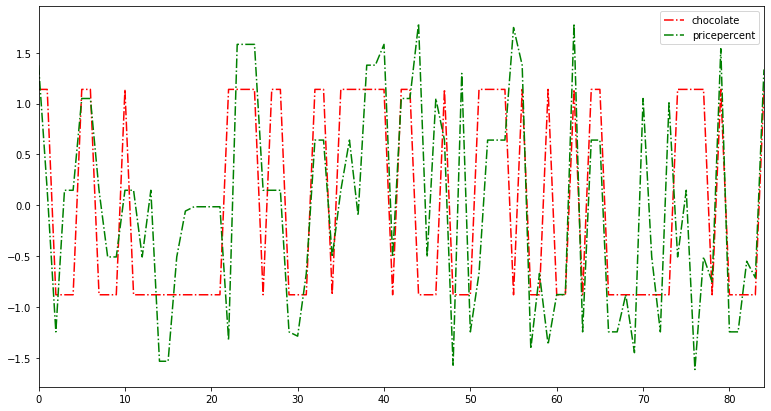

In [35]:
candy_scalar["chocolate"].plot.line(figsize=(13,7),color="r",linestyle="-.")
candy_scalar["pricepercent"].plot.line(figsize=(13,7),color="g",linestyle="-.")
plt.legend(["chocolate","pricepercent"])

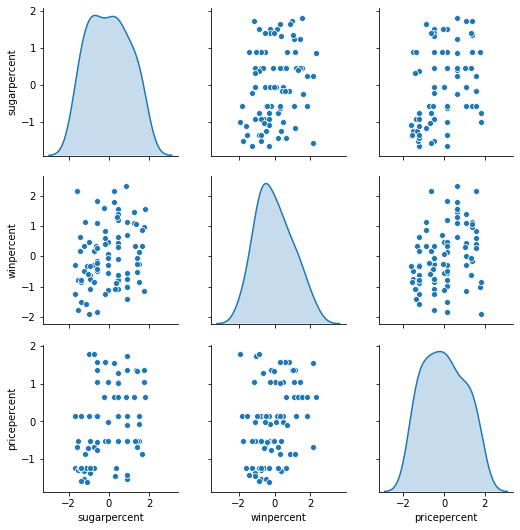

In [36]:
sns.pairplot(data=candy_scalar[["sugarpercent","winpercent","pricepercent"]],size=2.5,diag_kind="kde")

**Train Test Split**

In [0]:
x=candy_scalar.loc[:,candy_scalar.columns!="fruity"]
y=candy_scalar["fruity"]

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [39]:
x_train.shape

(68, 11)

In [40]:
y_train.shape

(68,)

In [41]:
x_test.shape

(17, 11)

In [42]:
y_test.shape

(17,)

**Model Building | try different models and check Performance metrics**

**Logistic Regression Classifier**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model=LogisticRegression()

In [45]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_test_log=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred_test_log)

0.8823529411764706

In [0]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test_log))
confusion_matrix

,0,1
0,8,2
1,0,7


In [0]:
confusion_matrix.index=["Actual No Fruity","Actual Fruity"]
confusion_matrix.columns=["Predicted No Fruity","Predicted Fruity"]

In [52]:
confusion_matrix

,Predicted No Fruity,Predicted Fruity
Actual No Fruity,8,2
Actual Fruity,0,7


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      1.00      0.88         7

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.91      0.88      0.88        17



*  Logistic regression model has very good accuracy but lesser than Decision Tree model



**Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred_test_dec=model1.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred_test_dec)

0.9411764705882353

In [59]:
print(classification_report(y_test,y_pred_test_dec))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



**we are getting highest Accuracy Score with decision Tree model with Nice Precision and Recall value as well**

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test_dec))
confusion_matrix

,0,1
0,9,1
1,0,7


In [0]:
confusion_matrix.index=["Actual No Fruity","Actual Fruity"]
confusion_matrix.columns=["Predicted No Fruity","Predicted Fruity"]

In [63]:
confusion_matrix

,Predicted No Fruity,Predicted Fruity
Actual No Fruity,9,1
Actual Fruity,0,7


In [64]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

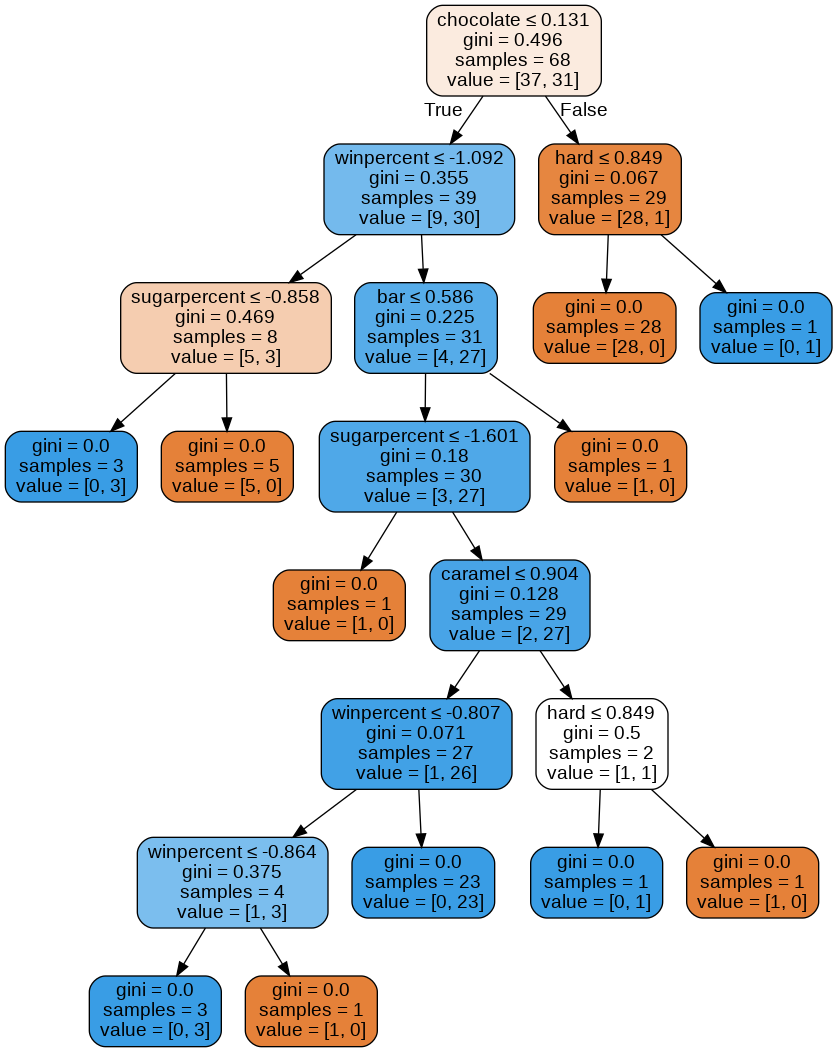

In [65]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_tree=tree.export_graphviz(model1, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

*  Tree Graph is created for visualtion Purpose.
*  can be analysed with Variables , Samples and Value
*  gini Index used here for operation

**Ensemble Learning | Bagging with Random Feature ie Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_test_rf=model2.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred_test_rf)

0.8235294117647058

In [71]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.75      0.86      0.80         7

    accuracy                           0.82        17
   macro avg       0.82      0.83      0.82        17
weighted avg       0.83      0.82      0.82        17



* Random Forest has Lowest Accuracy Score among Logistic and Decision Tree alogorithms.



**Checking Accuracy through GridSearch CV for Decision Tree to check if Accuracy can be Improved further**
* note :We already recieved Maxmium Accuracy Score with DT Algo.



In [0]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier=DecisionTreeClassifier(random_state=0)
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]

In [0]:
from sklearn.model_selection import GridSearchCV
Grid_cv=GridSearchCV(DecisionTreeClassifier,tree_para,cv=10,refit="AUC")

In [79]:
Grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [0]:
y_pred_test_dec_grid=Grid_cv.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred_test_dec_grid)

0.8823529411764706

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test_dec_grid))
confusion_matrix

,0,1
0,8,2
1,0,7


**Conclusion**

*  We recieved Maximum Accuracy with Decision Tree followed by Logistic Regression and in last Random Forest algo
*  we also tried with Grid search CV and as such No Improvement observed in Model Accuracy

